In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

## Camera calibration using chessboard images

In [2]:
# Representing 3d chessboard as (1,0,0),(2,0,0),(3,2,0) ...
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [3]:
objpoints = [] # object points
imgpoints = [] # image points

In [4]:
# glob to read images in camera_cal
images = glob.glob('camera_cal/calibration*')

In [5]:
for idx, image in enumerate(images):
    
    img = mpimg.imread(image)
    # convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 9X6 chessboard
    nx=9
    ny=6
    # get corners in the chessboard
    ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    
    if ret == True:
        # append object points 
        objpoints.append(objp)
        # append image points
        imgpoints.append(corners)

image = cv2.imread('./camera_cal/calibration1.jpg')
image_size = (image.shape[1],image.shape[0])

# Get Camera matrix and distortion coefficent
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,image_size,None,None)

Text(0.5, 1.0, 'Undistorted Image')

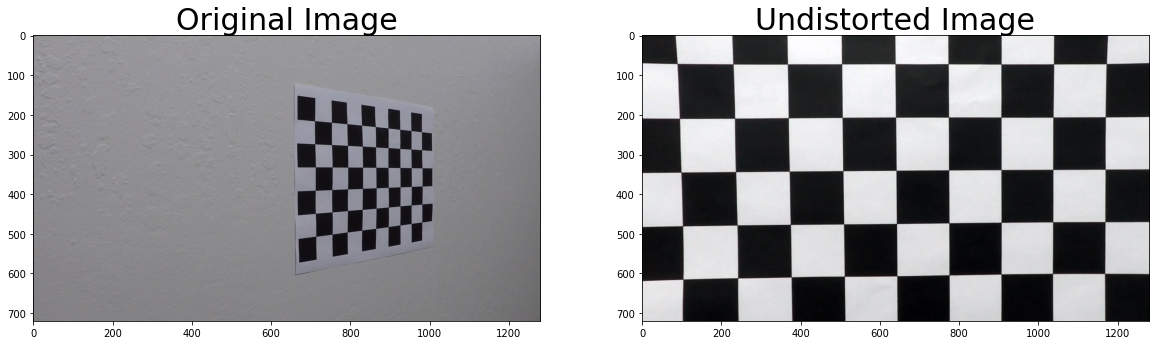

In [6]:
dst = cv2.undistort(image, mtx, dist, None, mtx)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration.p", "wb" ) )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)